# Group 1 - Data Mining and Data Science project

## 1. Background

*Describe the organization and its operations, operational environment, analytical needs, etc.*

The organization chosen for this project is a fictional movie production company in the film industry that is creating and directing new movies. The typical working process for the company is as follow. They choose a work, or an idea, and get the full rights to it. Then they put the crew together, consisting of writer, director and actors. When all this is done they reach out to investors to get the money needed to produce the film. Then they create the film and sell it to theatres and resellers.

In recent years, the company has not used any specific strategy for movie production. They have tried to guess what kind of movies people like and from that invested huge financial capital in the production. Then they have put the crew together without making any major analysis in advance. This strategy has only managed to produce a few successful movies, but the majority of all produced films are at a loss. The company has repeatedly tried to find a pattern for those movies that are profitable and sell well but has not succeeded yet. Eventually, they came to a point where they realized that their current strategy is not working well enough and if they continue as they do, they could be bankrupt in the near future. The next movie can be crucial for the company's survival.

One of the factors that may increase the chance of a movie to be successful is that it has high ratings on IMDb. Many film companies use IMDB to find best-selling movies, therefore, high rated movies have a greater chance of generating profits (Meenakshi et al., 2018). Therefore, the company's primary goal is to get the best possible rating on IMDb. 


## 2. Problem description

*Describe the problem that the organization is facing and the research question it needs answered.*

### 2.1 Problem description

The company has released several movies but none of them has been particularly successful. For their next movie, the aim is to make a bestseller, or at least more profitable, to get the company back on track again. This time they want to make an analysis of what factors they should take into account before starting the creation process of the movie. They want to find out what is most important to allocate their financial resources too, to optimize and improve the success rate of the film. This in turn to increases the monetary results of the film and reach their goal. 

It is difficult to say what aspects of a movie that are the most crucial factors of defining a movie as good (Oliver and Hartman, 2010). In addition to this, as Sharda and Delen (2006) explain that it is also very difficult to predict the demand for a movie in advance. Therefore this makes the movie business one of the riskiest endeavours for investors. There are even people claiming that it is not possible to predict how a movie is going to do in the marketplace (Sharda and Delen, 2006). As Jack Valenti, the former president of Motion Picture Association of America once said: “Excellence is a fragile substance and movie making is a collaboration of talent, which is why it is hard to make and buy great films.”  (Valenti, 1978). He is entitled that talent is required for making a good movie, as movies are subject to subjective judgment by the viewers. However, with the help of new technologies and methods, it could be possible to “hack” the normal way of producing movies to increase the chances of being successful.

This project will look into if it is possible to do an analysis of the quantitative data of movies available at IMDb which are; the length of the movie, actors, writer,  director and genre. Then based on these, see if there are any factors that can increase the chances of producing a highly rated movie. One approach to this is data mining. According to Wu (et. al., 2014), Big Data can be used to explore a large amount of data and extract useful information. By using data mining on ratings of movies, and data of the movie, from the well-known website IMDb, some useful information hopefully will be extracted and used to help the company what they need to improve for the next movie.

### 2.2 Research questions
	
Based on the above this report will answer the following questions:
Which are the most common factors for success among highly rated movies at IMDb? And which could be used or should not be used for the company’s next movie?

### 2.3 Hypothesis

To answer the question being asked, this research will look at factors that are believed to play a great role if the movie will get a high grade from the people watching it or not. The hypothesis, based on the data available through IMDb, is that the movie’s running time, the actors in it, the writer, the director and the genre are the factors that could have a major impact on the result. 

**_Running time_**

It is not certain if previous researches have included a movie’s running time as a success factor for a movie. However, this could be interesting to look at. It is not impossible to think that the length has some impact on the viewers. Perhaps a too long movie will make the audience lose their concentration, or if it is too short they do not have time to fully get into the movie. 

**_Writers_**

The writers  often, in comparison to actors and directors,  tend to be quite anonymous in relation to their films. And as Batty (2015) describes, there is a lack of screen production research which means that this is an area that may contain gaps. What is also important to baere in mind is that it is the writer who is the one who creates the basic material of the movie. Therefore in this analysis it should not matter who the writer of the movie is because the result is what is going to be used by the writer.  Nevertheless this is an interesting factor to look at in relation to the movie’s success rate, but in the end it should not significantly affect our result.

**_Actors_**

When others have tried to analyse the factors to a movie’s success many of them have looked into the impact of the stars of the movie (Lee et. al, 2016).That is, the actors. Lee et. al (2014) are using a measurement of “star buzz” in their analysis of a successful movie. Since many other movie researches are using this as a factor, and even though it has shown a mixed result, it seems like a factor that should be considered. It is also not difficult to imagine that a movie with a popular actor with many fans gets high rated just because the actor is acting in it. 

**_Director_**

The director of the movie is likely to have an impact on the success rate. Parkeh and Biswas (2015) are analysing the factors that have most impact on movies in certain genres. Their results shows that in all of the six genres, direction is one of the driving factors. Therefore this factor will be used in this report as well. The difference in this research is that the aim is to find the names of the directors that often create successful movies. 

**_Genre_**

The genre is used in this analysis since it is commonly used in other researches like this one (Lee et. al, 2014). It could be interesting to see if there are any specific genres that are extra popular now. 

### 2.3 Data Mining Goals and Success Criteria 

The goal with this data mining project is to have created a model showing the factors that will make a successful movie. 

Success criteria:
A pattern can be interpreted.
The prediction is somewhat credible.



## 3. Data collection

*Document your data collection process and the properties of the data here. Implement, using Python code, to load and preprocess your selected dataset.*

### 3.1 Data Collection

The data used for the analysis will be user rating data from IMDb. This data is free and can be obtained from IMDB (imdb.com, 2018) with its documentation available at https://www.imdb.com/interfaces/. The datasets contains complete user rating data from IMDb and in addition to the rating it contains additional information about the movie titles and actors. The table about the directors and writers for every movie will be left out due to reducing the scope of the project. The information selected is considered relevant enough to get useful results for the movie company.

MDb is used as the primary source for this project because of the following reasons: IMDB provides a large movie set that is open to all users, it has information related to movie ratings, movie genres, actors, directors and writers.
Movies on IMDB are exposed to a large number of people. At present, IMDB has about 83 million registered users (IMDB.com). IMDB does not have a complete dataset, it lacks information about movie budget, revenue other important factors. But the information available is considered sufficient for the purpose of this project.

### 3.2 Datasets/Tables

For the analysis four different datasets will be downloaded from IMDb, these are: “Title Basics”, “Title Ratings”, “Name Basics” and “Title Principals”. 

In [48]:
# Run this cell to import the modules and set up some stuff
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]
import warnings
warnings.filterwarnings('ignore')
import collections
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn import tree

- “Title Basics” contains basic information related to the movie title and the columns that will be used from this table are “tconst”, “titleType”, “tvepisode”, “primaryTitle”, “startYear”, “runtimeMinutes” and “genres”.

In [2]:
title_basics = pd.read_csv(
    "https://datasets.imdbws.com/title.basics.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'titleType': str, 'primaryTitle': str, 'originalTitle': str, 'isAdult': int, 'startYear': str, 'endYear': str, 'runtimeMinutes': str, 'genres': str}
)

- “Name Basics ” contains information about all people working with each movie, but only information about actors will be used. The columns that will be used are “nconst”, “primaryName” and “knownForTitles”.

In [3]:
name_basics = pd.read_csv(
    "https://datasets.imdbws.com/name.basics.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'nconst': str, 'primaryName': str, 'birthYear': str, 'deathYear': str, 'primaryProfession': str, 'knownForTitles': str}
)

- “Title Ratings” contains the actual information about the ratings for each title and the columns that will be used for this table are “tconst”, “averageRating” and “numVotes”.

In [4]:
title_ratings = pd.read_csv(
    "https://datasets.imdbws.com/title.ratings.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'averageRating': float, 'numVotes': int}
)

- “Title Principals” contains information about the principal people related to every movie. The columns that will be used are “tconst”, “ordering”, “nconst” and “category”.

In [5]:
title_principals = pd.read_csv(
    "https://datasets.imdbws.com/title.principals.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'ordering': int, 'nconst': str, 'category': str, 'job': str, 'characters': str}
)

- “Title crew” contains information about the writers and directors of a movie. The columns that will be used are “tconst”, “directors” and “writers”.

In [6]:
title_crew = pd.read_csv(
    "https://datasets.imdbws.com/title.crew.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'directors': str, 'writers': str}
)

The table below is visualization of the datasets and which columns that will be used and which that will be filtered out. The cells marked in green will be used and the others will be left out. The constants are used for joining the tables together.

<img src="Table of tables.png">

## 3.3 Preprocessing

### 3.3.1 Initial filtering

We filter out only the relevant columns in each table below:

In [7]:
name_basics = name_basics[['nconst', 'primaryName', 'knownForTitles']]
title_basics = title_basics[['tconst', 'titleType', 'primaryTitle', 
                             'startYear', 'runtimeMinutes', 'genres']]
title_principals = title_principals[['tconst', 'ordering', 'nconst', 'category']]

We filter out only the movies from the year 2000 and until 2017:

In [8]:
title_basics_filtered = title_basics[title_basics.titleType == "movie"]
title_basics_filtered = title_basics_filtered[title_basics_filtered.startYear >= "2000"]
title_basics_filtered = title_basics_filtered[title_basics_filtered.startYear <= "2017"]
title_basics_filtered = title_basics_filtered[['tconst', 'primaryTitle', 
                             'startYear', 'runtimeMinutes', 'genres']]
title_basics_filtered

,tconst,primaryTitle,startYear,runtimeMinutes,genres
34822,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance"
65547,tt0066853,Na Boca da Noite,2016,68,Drama
86845,tt0088751,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi"
92819,tt0094859,Chief Zabu,2016,74,Comedy
93991,tt0096056,Crime and Punishment,2002,126,Drama
95433,tt0097540,Responso,2004,81,\N
98103,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy"
100143,tt0102362,Istota,2000,80,"Drama,Romance"
103575,tt0105849,Xavier,2003,100,\N
105395,tt0107706,Stupid Lovers,2000,\N,\N


We filter out all ratings with at least 1000 votes:

In [9]:
title_ratings_filtered = title_ratings.loc[title_ratings['numVotes'] >= 1000]
title_ratings_filtered

,tconst,averageRating,numVotes
0,tt0000001,5.8,1440
2,tt0000003,6.6,1041
4,tt0000005,6.2,1737
7,tt0000008,5.6,1539
9,tt0000010,6.9,5131
11,tt0000012,7.4,8608
12,tt0000013,5.7,1319
13,tt0000014,7.2,3745
24,tt0000026,5.7,1137
27,tt0000029,5.9,2455


In [10]:
movies_ratings = pd.merge(title_basics_filtered, title_ratings_filtered, on='tconst')
movies_ratings

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72502
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20533
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1531
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100933
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423
5,tt0118926,The Dancer Upstairs,2002,132,"Crime,Drama,Thriller",7.0,6014
6,tt0119004,Don's Plum,2001,89,"Comedy,Drama",5.8,3669
7,tt0119273,Heavy Metal 2000,2000,88,"Action,Adventure,Animation",5.4,7031
8,tt0120202,State and Main,2000,105,"Comedy,Drama",6.8,19310
9,tt0120263,Songs from the Second Floor,2000,98,"Comedy,Drama",7.7,15184


In [11]:
movies_ratings_crew = pd.merge(movies_ratings, title_crew, on='tconst')
movies_ratings_crew

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72502,nm0003506,"nm0737216,nm0003506"
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20533,nm0193554,"nm0921985,nm0486824"
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1531,nm0440948,nm0551138
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100933,nm0939182,nm0939182
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277
5,tt0118926,The Dancer Upstairs,2002,132,"Crime,Drama,Thriller",7.0,6014,nm0000518,nm0787649
6,tt0119004,Don's Plum,2001,89,"Comedy,Drama",5.8,3669,nm0730222,"nm0039192,nm0065818,nm0730222,nm0836476,nm0923673"
7,tt0119273,Heavy Metal 2000,2000,88,"Action,Adventure,Animation",5.4,7031,"nm0170402,nm0501341","nm0084253,nm0127560,nm0247653,nm0313274,nm0532..."
8,tt0120202,State and Main,2000,105,"Comedy,Drama",6.8,19310,nm0000519,nm0000519
9,tt0120263,Songs from the Second Floor,2000,98,"Comedy,Drama",7.7,15184,nm0027815,nm0027815


In [12]:
import numpy as np

movies_ratings_crew['successfull'] = np.where(movies_ratings_crew['averageRating']>=7.0, 1, 0)
movies_ratings_crew

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successfull
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72502,nm0003506,"nm0737216,nm0003506",0
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20533,nm0193554,"nm0921985,nm0486824",0
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1531,nm0440948,nm0551138,0
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100933,nm0939182,nm0939182,1
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1
5,tt0118926,The Dancer Upstairs,2002,132,"Crime,Drama,Thriller",7.0,6014,nm0000518,nm0787649,1
6,tt0119004,Don's Plum,2001,89,"Comedy,Drama",5.8,3669,nm0730222,"nm0039192,nm0065818,nm0730222,nm0836476,nm0923673",0
7,tt0119273,Heavy Metal 2000,2000,88,"Action,Adventure,Animation",5.4,7031,"nm0170402,nm0501341","nm0084253,nm0127560,nm0247653,nm0313274,nm0532...",0
8,tt0120202,State and Main,2000,105,"Comedy,Drama",6.8,19310,nm0000519,nm0000519,0
9,tt0120263,Songs from the Second Floor,2000,98,"Comedy,Drama",7.7,15184,nm0027815,nm0027815,1


Number of successfull movies:

In [13]:
movies_ratings_crew.successfull.value_counts()

0    10733
1     4770
Name: successfull, dtype: int64

Delete rows without a runtime:

In [14]:
for i, row in movies_ratings_crew.iterrows():
    if movies_ratings_crew.at[i,'runtimeMinutes'] == r"\N" or movies_ratings_crew.at[i,'runtimeMinutes'] == r"\\N":
        movies_ratings_crew.at[i,'runtimeMinutes'] = None

movies_ratings_crew = movies_ratings_crew.dropna(subset=['runtimeMinutes'])

movies_ratings_crew['runtimeMinutes'] = movies_ratings_crew['runtimeMinutes'].astype(int)
movies_ratings_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15454 entries, 0 to 15502
Data columns (total 10 columns):
tconst            15454 non-null object
primaryTitle      15454 non-null object
startYear         15454 non-null object
runtimeMinutes    15454 non-null int32
genres            15454 non-null object
averageRating     15454 non-null float64
numVotes          15454 non-null int32
directors         15454 non-null object
writers           15454 non-null object
successfull       15454 non-null int32
dtypes: float64(1), int32(3), object(6)
memory usage: 1.1+ MB


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Get only the first director, writer and genre:

In [15]:
for i, row in movies_ratings_crew.iterrows():
      movies_ratings_crew.at[i,'directors'] = movies_ratings_crew.at[i,'directors'].split(',')[0]

In [16]:
for i, row in movies_ratings_crew.iterrows():
      movies_ratings_crew.at[i,'writers'] = movies_ratings_crew.at[i,'writers'].split(',')[0]

In [17]:
for i, row in movies_ratings_crew.iterrows():
      movies_ratings_crew.at[i,'genres'] = movies_ratings_crew.at[i,'genres'].split(',')[0]

In [18]:
movies_ratings_crew

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successfull
0,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,72502,nm0003506,nm0737216,0
1,tt0118589,Glitter,2001,104,Drama,2.2,20533,nm0193554,nm0921985,0
2,tt0118652,The Attic Expeditions,2001,100,Comedy,5.1,1531,nm0440948,nm0551138,0
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100933,nm0939182,nm0939182,1
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1
5,tt0118926,The Dancer Upstairs,2002,132,Crime,7.0,6014,nm0000518,nm0787649,1
6,tt0119004,Don's Plum,2001,89,Comedy,5.8,3669,nm0730222,nm0039192,0
7,tt0119273,Heavy Metal 2000,2000,88,Action,5.4,7031,nm0170402,nm0084253,0
8,tt0120202,State and Main,2000,105,Comedy,6.8,19310,nm0000519,nm0000519,0
9,tt0120263,Songs from the Second Floor,2000,98,Comedy,7.7,15184,nm0027815,nm0027815,1


Get the top 2 actors for each movie:

In [19]:
title_principals_filtered = title_principals[(title_principals.category == "actor") | (title_principals.category == "actress")]
title_principals_filtered = title_principals_filtered[title_principals_filtered.ordering == 1]
title_principals_filtered = title_principals_filtered[title_principals_filtered['tconst'].isin(movies_ratings_crew['tconst'])]
title_principals_filtered = title_principals_filtered[['tconst', 'nconst']]
title_principals_filtered

,tconst,nconst
280645,tt0035423,nm0000212
1006073,tt0118589,nm0001014
1006618,tt0118652,nm0427470
1006987,tt0118694,nm0504897
1008370,tt0118852,nm0000199
1009058,tt0118926,nm0000849
1009752,tt0119004,nm0089231
1012011,tt0119273,nm0000461
1020097,tt0120202,nm0000450
1020643,tt0120263,nm0635070


In [20]:
movies_ratings_crew_actors = pd.merge(movies_ratings_crew, title_principals_filtered, on='tconst')
movies_ratings_crew_actors = movies_ratings_crew_actors.rename(columns={'nconst': 'actor1'})
movies_ratings_crew_actors

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successfull,actor1
0,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,72502,nm0003506,nm0737216,0,nm0000212
1,tt0118589,Glitter,2001,104,Drama,2.2,20533,nm0193554,nm0921985,0,nm0001014
2,tt0118652,The Attic Expeditions,2001,100,Comedy,5.1,1531,nm0440948,nm0551138,0,nm0427470
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100933,nm0939182,nm0939182,1,nm0504897
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199
5,tt0118926,The Dancer Upstairs,2002,132,Crime,7.0,6014,nm0000518,nm0787649,1,nm0000849
6,tt0119004,Don's Plum,2001,89,Comedy,5.8,3669,nm0730222,nm0039192,0,nm0089231
7,tt0119273,Heavy Metal 2000,2000,88,Action,5.4,7031,nm0170402,nm0084253,0,nm0000461
8,tt0120202,State and Main,2000,105,Comedy,6.8,19310,nm0000519,nm0000519,0,nm0000450
9,tt0120263,Songs from the Second Floor,2000,98,Comedy,7.7,15184,nm0027815,nm0027815,1,nm0635070


In [21]:
title_principals_filtered = title_principals[(title_principals.category == "actor") | (title_principals.category == "actress")]
title_principals_filtered = title_principals_filtered[title_principals_filtered.ordering == 2]
title_principals_filtered = title_principals_filtered[title_principals_filtered['tconst'].isin(movies_ratings_crew['tconst'])]
title_principals_filtered = title_principals_filtered[['tconst', 'nconst']]
title_principals_filtered

,tconst,nconst
280646,tt0035423,nm0413168
1006074,tt0118589,nm0073160
1006619,tt0118652,nm0001293
1006988,tt0118694,nm0001041
1008371,tt0118852,nm0001583
1009059,tt0118926,nm0603090
1009753,tt0119004,nm0175305
1012012,tt0119273,nm0001781
1020098,tt0120202,nm0000513
1020644,tt0120263,nm0489281


In [22]:
movies_ratings_crew_actors = pd.merge(movies_ratings_crew_actors, title_principals_filtered, on='tconst')
movies_ratings_crew_actors = movies_ratings_crew_actors.rename(columns={'nconst': 'actor2'})
movies_ratings_crew_actors

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successfull,actor1,actor2
0,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,72502,nm0003506,nm0737216,0,nm0000212,nm0413168
1,tt0118589,Glitter,2001,104,Drama,2.2,20533,nm0193554,nm0921985,0,nm0001014,nm0073160
2,tt0118652,The Attic Expeditions,2001,100,Comedy,5.1,1531,nm0440948,nm0551138,0,nm0427470,nm0001293
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100933,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583
5,tt0118926,The Dancer Upstairs,2002,132,Crime,7.0,6014,nm0000518,nm0787649,1,nm0000849,nm0603090
6,tt0119004,Don's Plum,2001,89,Comedy,5.8,3669,nm0730222,nm0039192,0,nm0089231,nm0175305
7,tt0119273,Heavy Metal 2000,2000,88,Action,5.4,7031,nm0170402,nm0084253,0,nm0000461,nm0001781
8,tt0120202,State and Main,2000,105,Comedy,6.8,19310,nm0000519,nm0000519,0,nm0000450,nm0000513
9,tt0120263,Songs from the Second Floor,2000,98,Comedy,7.7,15184,nm0027815,nm0027815,1,nm0635070,nm0489281


Delete movies with null values:

In [23]:
movies_ratings_crew_actors['directors'] = movies_ratings_crew_actors['directors'].replace(r'\N', np.nan)
movies_ratings_crew_actors = movies_ratings_crew_actors.dropna(axis=0, subset=['directors'])

movies_ratings_crew_actors['writers'] = movies_ratings_crew_actors['writers'].replace(r'\N', np.nan)
movies_ratings_crew_actors = movies_ratings_crew_actors.dropna(axis=0, subset=['writers'])

movies_ratings_crew_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14395 entries, 0 to 14484
Data columns (total 12 columns):
tconst            14395 non-null object
primaryTitle      14395 non-null object
startYear         14395 non-null object
runtimeMinutes    14395 non-null int32
genres            14395 non-null object
averageRating     14395 non-null float64
numVotes          14395 non-null int32
directors         14395 non-null object
writers           14395 non-null object
successfull       14395 non-null int32
actor1            14395 non-null object
actor2            14395 non-null object
dtypes: float64(1), int32(3), object(8)
memory usage: 1.3+ MB


## 4. Data analysis

*Document you choice and motivation for selected data mining method(s) here. Choose a data mining method(s) to use in Python code to perform an analysis of your chosen dataset. Describe why you chose the method(s) and what interesting things you have found from the analysis.*

The method chosen for this analysis is classification and the technique used is the decision tree classifier. A decision tree is a methodology to reach a final conclusion by taking a complex decision and divide it into easier decisions (Safian, Landgrebe, 1991). By asking questions about the attributes, and then supplementary questions, in a hierarchical way, a decision or conclusion will finally be reached (Steinbach Kumar, 2014). A tree has three types of nodes, root node, internal nodes and leafs (2014).  When asking questions and receiving answers a path will follow the nodes until a leaf is reached and that is where the final decision or conclusion is being made (2014).

 Hunts algorithm?

This technique will enable the possibilities to do a prediction if a movie will get high rating or not by asking questions and following the nodes to see whether the movie fulfils all the criteria to become a highly rated movie. 

### Actors
All the actors in at least one of the movies:

In [24]:
actors = pd.concat([movies_ratings_crew_actors['actor1'], movies_ratings_crew_actors['actor2']])
actors = actors.value_counts().reset_index()
actors.columns = ['actors', 'movies']
actors

,actors,movies
0,nm0474774,64
1,nm0000821,47
2,nm0000115,44
3,nm0222426,41
4,nm0000168,39
5,nm0006795,37
6,nm0290556,34
7,nm0000354,33
8,nm0000173,30
9,nm0451321,30


Creates a table of successfull movies:

In [25]:
successfull_movies = movies_ratings_crew_actors[movies_ratings_crew_actors.successfull == 1]
successfull_movies

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successfull,actor1,actor2
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100933,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583
5,tt0118926,The Dancer Upstairs,2002,132,Crime,7.0,6014,nm0000518,nm0787649,1,nm0000849,nm0603090
9,tt0120263,Songs from the Second Floor,2000,98,Comedy,7.7,15184,nm0027815,nm0027815,1,nm0635070,nm0489281
11,tt0120626,April Captains,2000,123,Drama,7.1,2630,nm0210218,nm0210218,1,nm0009629,nm0210218
12,tt0120630,Chicken Run,2000,84,Adventure,7.0,159260,nm0661910,nm0520485,1,nm0000154,nm0768018
14,tt0120679,Frida,2002,123,Biography,7.4,72487,nm0853380,nm0380419,1,nm0000161,nm0000547
16,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,178,Adventure,8.8,1454140,nm0001392,nm0866058,1,nm0000704,nm0005212
21,tt0120903,X-Men,2000,104,Action,7.4,520187,nm0001741,nm0220892,1,nm0001772,nm0413168
24,tt0120917,The Emperor's New Groove,2000,78,Adventure,7.3,154003,nm0227540,nm0930261,1,nm0005450,nm0000422


In [26]:
successfull_actors = pd.concat([successfull_movies['actor1'], successfull_movies['actor2']])
successfull_actors = successfull_actors.value_counts().reset_index()
successfull_actors.columns = ['actors', 'successfullMovies']
actors = pd.merge(actors, successfull_actors, on='actors', how='outer')
actors.fillna(value=0, inplace=True)
actors

,actors,movies,successfullMovies
0,nm0474774,64,15.0
1,nm0000821,47,17.0
2,nm0000115,44,5.0
3,nm0222426,41,12.0
4,nm0000168,39,8.0
5,nm0006795,37,3.0
6,nm0290556,34,4.0
7,nm0000354,33,12.0
8,nm0000173,30,8.0
9,nm0451321,30,15.0


In [27]:
for i, row in actors.iterrows():
    actors.at[i, 'successRate'] = actors.at[i, 'successfullMovies'] / actors.at[i, 'movies']
    
actors.sort_values(by='successRate', ascending=0)

,actors,movies,successfullMovies,successRate
6477,nm5993940,1,1.0,1.0
7125,nm2102116,1,1.0,1.0
6768,nm0820241,1,1.0,1.0
6766,nm0474565,1,1.0,1.0
6765,nm5362361,1,1.0,1.0
6763,nm4857666,1,1.0,1.0
6761,nm0169806,1,1.0,1.0
6747,nm0328494,1,1.0,1.0
6736,nm7621668,1,1.0,1.0
6733,nm0947720,1,1.0,1.0


### Directors

In [28]:
directors = collections.Counter(movies_ratings_crew_actors["directors"]).most_common()
directors = pd.DataFrame(list(directors))
directors.columns = ["directors", "movies"]
directors

,directors,movies
0,nm0586281,29
1,nm0093051,24
2,nm0001752,19
3,nm0000095,18
4,nm0698184,17
5,nm1347153,17
6,nm0864775,16
7,nm0000631,15
8,nm0654830,15
9,nm1104118,15


In [29]:
successfull_directors = successfull_movies['directors']
successfull_directors = successfull_directors.value_counts().reset_index()
successfull_directors.columns = ['directors', 'successfullMovies']
directors = pd.merge(directors, successfull_directors, on='directors', how='outer')
directors.fillna(value=0, inplace=True)
directors

,directors,movies,successfullMovies
0,nm0586281,29,9.0
1,nm0093051,24,0.0
2,nm0001752,19,7.0
3,nm0000095,18,5.0
4,nm0698184,17,5.0
5,nm1347153,17,0.0
6,nm0864775,16,7.0
7,nm0000631,15,9.0
8,nm0654830,15,5.0
9,nm1104118,15,10.0


In [30]:
for i, row in directors.iterrows():
    directors.at[i, 'directorRate'] = directors.at[i, 'successfullMovies'] / directors.at[i, 'movies']
directors.sort_values(by='directorRate', ascending=0)

,directors,movies,successfullMovies,directorRate
3846,nm0420112,1,1.0,1.0
4068,nm0307497,1,1.0,1.0
3971,nm0889829,1,1.0,1.0
3973,nm0605479,1,1.0,1.0
3979,nm0700217,1,1.0,1.0
3982,nm0764591,1,1.0,1.0
3994,nm1048533,1,1.0,1.0
3999,nm0744107,1,1.0,1.0
4000,nm0845207,1,1.0,1.0
4007,nm1417119,1,1.0,1.0


### Writers

In [31]:
writers = collections.Counter(movies_ratings_crew_actors["writers"]).most_common()
writers = pd.DataFrame(list(writers))
writers.columns = ["writers", "movies"]
writers

,writers,movies
0,nm0000108,27
1,nm0000095,18
2,nm1347153,18
3,nm0421314,17
4,nm1104118,16
5,nm0080327,15
6,nm0491956,12
7,nm0159147,12
8,nm1140275,12
9,nm1436693,12


In [32]:
successfull_writers = successfull_movies['writers']
successfull_writers = successfull_writers.value_counts().reset_index()
successfull_writers.columns = ['writers', 'successfullMovies']
writers = pd.merge(writers, successfull_writers, on='writers', how='outer')
writers.fillna(value=0, inplace=True)
writers

,writers,movies,successfullMovies
0,nm0000108,27,4.0
1,nm0000095,18,5.0
2,nm1347153,18,0.0
3,nm0421314,17,5.0
4,nm1104118,16,11.0
5,nm0080327,15,1.0
6,nm0491956,12,9.0
7,nm0159147,12,3.0
8,nm1140275,12,7.0
9,nm1436693,12,8.0


In [90]:
for i, row in writers.iterrows():
    writers.at[i, 'writerRate'] = writers.at[i, 'successfullMovies'] / writers.at[i, 'movies']

writers.sort_values(by='movies', ascending=0)

,writers,movies,successfullMovies,writerRate
0,nm0000108,27,4.0,0.148148
2,nm1347153,18,0.0,0.000000
1,nm0000095,18,5.0,0.277778
3,nm0421314,17,5.0,0.294118
4,nm1104118,16,11.0,0.687500
5,nm0080327,15,1.0,0.066667
9,nm1436693,12,8.0,0.666667
8,nm1140275,12,7.0,0.583333
7,nm0159147,12,3.0,0.250000
6,nm0491956,12,9.0,0.750000


In [94]:
name_basics[name_basics.nconst == 'nm0491956']

,nconst,primaryName,knownForTitles
466582,nm0491956,Paul Laverty,"tt5168192,tt0313670,tt0460989,tt1924394"


### Time

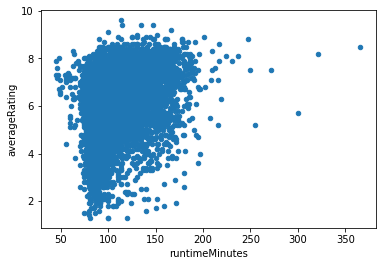

In [34]:
movies_ratings_crew_actors.plot.scatter(x='runtimeMinutes', y='averageRating')

### Decision Tree

In [35]:
movies_ratings_crew_actors.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successfull,actor1,actor2
0,tt0035423,Kate & Leopold,2001,118,Comedy,6.4,72502,nm0003506,nm0737216,0,nm0000212,nm0413168
1,tt0118589,Glitter,2001,104,Drama,2.2,20533,nm0193554,nm0921985,0,nm0001014,nm0073160
2,tt0118652,The Attic Expeditions,2001,100,Comedy,5.1,1531,nm0440948,nm0551138,0,nm0427470,nm0001293
3,tt0118694,In the Mood for Love,2000,98,Drama,8.1,100933,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583


In [67]:
df = pd.merge(movies_ratings_crew_actors, directors[['directors', 'directorRate']], on='directors')

df = pd.merge(df, writers[['writers', 'writerRate']], on='writers')

df = pd.merge(df, actors[['actors', 'successRate']], left_on='actor1', right_on='actors')
df = df.rename(columns={'successRate': 'actor1Rate'})

df = pd.merge(df, actors[['actors', 'successRate']], left_on='actor2', right_on='actors')
df = df.rename(columns={'successRate': 'actor2Rate'})

df['actorAvgRate'] = (df['actor1Rate'] + df['actor2Rate']) / 2

df = df[['runtimeMinutes', 'successfull', 'directorRate', 'writerRate', 'actor1Rate', 'actor2Rate', 'actorAvgRate']]
df

,runtimeMinutes,successfull,directorRate,writerRate,actor1Rate,actor2Rate,actorAvgRate
0,118,0,0.571429,0.333333,0.000000,0.500000,0.250000
1,96,0,0.277778,0.277778,0.277778,0.500000,0.388889
2,104,1,0.714286,1.000000,0.375000,0.500000,0.437500
3,134,1,0.714286,0.250000,0.375000,0.500000,0.437500
4,104,0,0.125000,0.500000,0.375000,0.500000,0.437500
5,130,1,1.000000,1.000000,0.714286,0.500000,0.607143
6,99,0,0.000000,0.000000,0.050000,0.500000,0.275000
7,165,0,0.666667,0.200000,0.266667,0.500000,0.383333
8,106,1,0.666667,1.000000,0.666667,0.500000,0.583333
9,111,0,0.428571,0.000000,0.000000,0.500000,0.250000


In [78]:
successfull_data = df.successfull
X_train, X_test, y_train, y_test = train_test_split(df[['runtimeMinutes', 'directorRate', 'writerRate', 'actorAvgRate']], successfull_data, test_size=0.25)
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

Our training data has 10796 rows
Our test data has 3599 rows


In [83]:
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
sample = X_test.head(10)
sample['successfull'] = classifier.predict(sample)
sample

,runtimeMinutes,directorRate,writerRate,actorAvgRate,successfull
3744,88,0.0,0.000000,0.000000,0
8243,89,0.0,0.000000,0.000000,0
10165,102,1.0,0.888889,0.750000,1
8329,104,0.0,0.250000,0.392857,0
4735,149,0.0,0.000000,0.341026,0
12152,97,0.0,0.000000,0.000000,0
2042,92,0.0,0.000000,0.125000,0
13387,90,0.0,0.000000,0.000000,0
1864,85,0.0,0.000000,0.068182,0
13923,111,1.0,1.000000,1.000000,1


In [85]:
!set PATH=PATH;C:/Program Files (x86)/Graphviz2.38/bin/
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

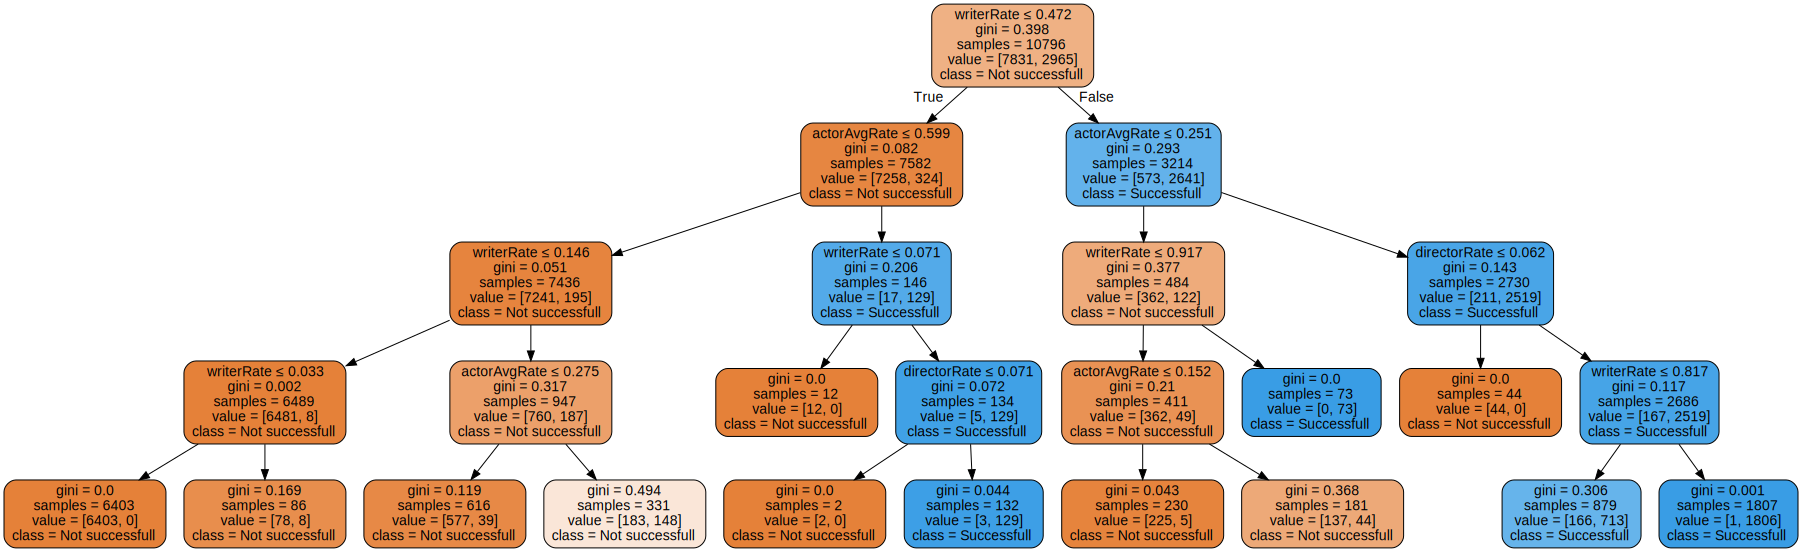

In [86]:
tree_plot = Source(tree.export_graphviz(classifier, out_file=None, 
                            feature_names=X_train.columns, class_names=['Not successfull', 'Successfull'], 
                            filled=True, rounded=True, special_characters=True))
tree_plot


## 5. Evaluation of results

*Document an evaluation your analysis results and describe how potentially actionable they are.*

In [41]:
# Add your own code

## 6. Schedule and description of project plan

*Rough schedule for the project beyond the pilot study presented in 3-5. This does not have to be advanced, you can simply provide an estimate based upon reported schedules for similar projects in the literature.*

The project plan for this project is based on the CRISP-DM model, showing the steps for best practice in data mining.

<img src="CRISP-DM.png">

*Figure 1: Phases of the CRISP-DM reference model*

**Business Understanding**

The first step of CRISP is to get an understanding of the business, the organisation and the environment.  In this case it is about to get an understanding of the movie production business and to see what criterias that can be considered as a successful movies. What factors  that will be considered as a successful data mining result should also be decided in this step. 

We have an idea of what results we want to get and how to get it, what will take most of the time, in this step, is to learn more about the business. Therefore, the estimated time for this will be XX (% / hours).


**Data Understanding**

In this step the data should be collected, described, verified and initially analysed. The data understanding is included in stage 3 of this report where the datasets from IMDb are collected, then described in terms of data types and visualised in a table. 


The collection of the data will not take much time since all of the datasets are retrieved from the same webpage. What will be more time-consuming in this step is to describe it and to get an understanding of what information we could get out of the datasets. The estimated time for this will be XX hours (% of the project). 


**Data Preparation**
The preparation involves the selection of data. Why certain data of the datasets is selected is motivated at the beginning of the report. The data sets are based on a relational database and therefore a part of the preparation is to merge the datasets together so it is possible to select the wanted data from it since we do not want everything that is in all of the sets. All the movies that are missing any important data will also be removed.

Even though the data is relatively clean from the beginning we do have to do quite a lot with it to make it useful for this project. We estimate that this will be quite time consuming and will take about XX % / hours. 

**Modeling**

Based on the data that was selected in the preparation step and the desired result, a data mining method should be chosen, and then the model should be built. In this project a decision tree will be created and based on our previous experience this will take about XX of the time.

**Evaluation** 

This is about evaluating the results from the data mining. How well it succeeded in relation to the success criterias that were decided earlier.We believe that this will not be taking so long since it should be relatively easy to see if we get at good result or not. The estimated time for this will be XX.

**Deployment**

A plan for the deployment should be created as well as a plan for maintenance. This plan will vary depending on the results of this project. The documentation will be in progress throughout this project and finished when the results from the data mining is reached. 

This is estimated to take XX

## 7. Ethical aspects that need to be considered

*Are there ethical aspects that need to be considered? Are there legal implications (e.g., personal data / GDPR)? Are there implications if the case organization is a business, public authority, or nonprofit entity?*

Since this report is analysing the data from movies, it is not necessary to consider any ethical aspects when it comes to personal information etc, since this is about public movies and data that we have collected from IMDb. 

However, one ethical perspective could be the that this type of analysis might hamper the creativity in the creation of movies. If movies are created from an algorithm based on earlier movies this could obstruct the production of new movies. 	

## References

Craig Batty (2015) *A screenwriter's journey into theme, and how creative writing research might help us to define screen production research*, Studies in Australasian Cinema, 9:2, pp. 110-121

imdb.com (-), *Press Room*. Available: https://www.imdb.com/pressroom/about/ [2018-11-19]

imdb.com (2018), [online] Available at: https://datasets.imdbws.com/ [Accessed 22 Nov. 2018].

Meenakshi, K., Maragatham, G., Agarwal, N. and Ghosh, I. (2018). *A Data mining Technique for Analyzing and Predicting the success of Movie*. Journal of Physics: Conference Series, 1000, p.012100.

Oliver, M. B. & Hartman, T. (2010). *Exploring the Role of Meaningful Experiences in Users' Appreciation of “Good Movies”*. Berghahn Journals,Vol. 4, Issue 2, pp 128–150
Rasoul Safavian, S., Landgrebe, D. (1991), Transactions on Systems, Man and Cybernetics, vol. 21, NO. 3, pp. 360-674. 

Sharda, R. and Delen, D. (2006). *Predicting box-office success of motion pictures with neural networks*. Expert Systems with Applications 30. Stillwater, Oklahoma, pp.243–254.


Tan P-N., Steinbach, M., Kumar,V. (2014), *Introduction to Data Mining*, 1st ed, 7th ed., Harlow: Pearson

Valenti, J. (1978). *Motion Pictures and Their Impact on Society in the Year
2001*, speech given at the Midwest Research Institute, Kansas City,
April 25, p. 3.

Wu, X., Zhu, X., Wu, G. and Ding, W. (2014). *Data Mining with Big Data*. Transactions on knowledge and data engineering. IEEE, pp. 97-107.


